<a href="https://colab.research.google.com/github/yayra/E_commerce_Customer_Churn/blob/main/Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About the project**

The churn rate in e-commerce is one of the most crucial subscription metrics to ensure the profitability of the business. By performing churn prediction, such as determining how many customers are leaving and the reasons for their exit, the company can address persistent issues and establish a sustainable and robust business that will generate recurring revenue on a monthly basis.

My project consists of the following five steps:

1. Introduction
2. Exploratory Data Analysis with major inferences and recommendations for the business and customer service departments.
3. Preprocessing (encoding categorical data into numbers), pipeline, and modeling
4. Model evaluation

# **1. Introduction**

An e-commerce company recently noticed that many of their customers were churning unexpectedly, which could result in significant losses if it continues. So, they immediately worked on a plan to retain their customers. They approached the data analyst to ask for answers to the following questions:

* Provide a customer profile of churning customers.
* Which order categories have the highest number of churned customers?
* Make recommendations to the business and customer service departments for immediate action to retain customers.
* Finally, to build a model to predict customer churn."

To analyse the churn I used the dataset provided by Kaggle user. 

The data set belongs to a leading online E-Commerce company. An online retail (eCommerce) company wants to know the customers who are going to churn, so accordingly they can approach customers to offer some promos to retain them. 

Before proceeding to the churn prediction, in this notebook, I will implement the first two steps on a customer dataset for churn analysis (Introduction and Exploratory Data Analysis).



# **2. Exploratory Data Anlysis**

Foe EDA python's pandas, numpy, matplotlib, seaborn packages will be used. 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="https://github.com/yayra/E_commerce_Customer_Churn/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# 2.1. Summary Info & Stats

The original dataset was provided by Kaggle [user](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?resource=download).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

The dataset consists of 5630 records(rows) and 20 features(columns).
Among 20 columns 5 columns are categorical. For building the model categorical variables must be converted into numeric data format. 

# 2.2. Missing values.
There are 1,856 missing values in the dataset, which comprises 33% of all rows. Each of 1,856 rows has one missing value. 

In [6]:
#Count of missing values in the dataset
print(f"Count of missing values: {df.isnull().sum().sum()}")
#Count of rows with missing data
missing_rows = df.isnull().any(axis=1).sum()
print(f"Count of rows with missing data: {missing_rows}")
#Percentage of rows with missing data
print(f"% of rows with missing data: {np.round(missing_rows/len(df)*100)}%")

Count of missing values: 1856
Count of rows with missing data: 1856
% of rows with missing data: 33.0%


# 2.3. Overview of the dataset




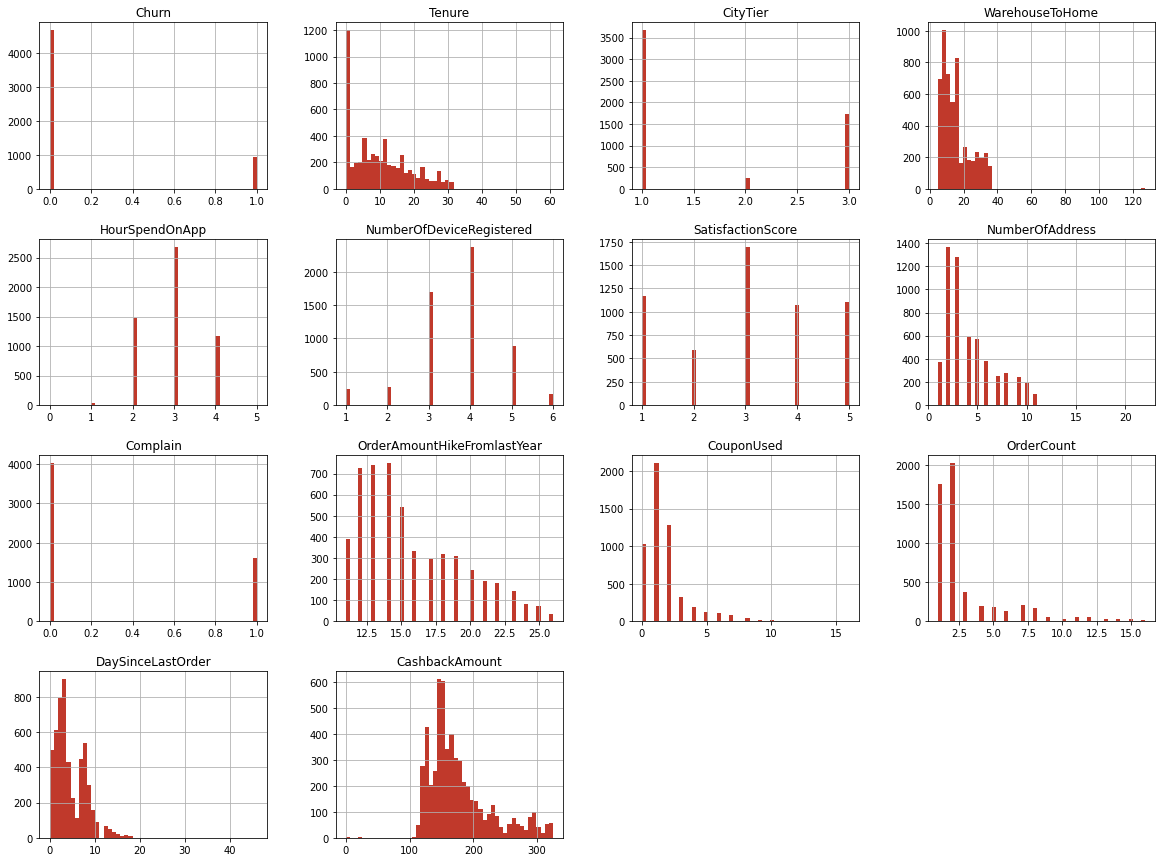

In [4]:
df.drop('CustomerID', axis=1, inplace=True)

%matplotlib inline
df.hist(bins=50, figsize=(20,15), color='#C0392B')
plt.show()


A quick glance at the graphs helps us to make the following findings about the dataset:

*   Lots of data in column 'Tenure' is at the low end. Around 1,200 customers are described as being new customers staying with the company 0,1 year or unknown(264 NaN values). This needs to be checked with the right team from the business department.
*   Majority of the customers are from City Tier 1, followed by City Tier 3. We can say that major customers of the company are from densily populated and highly developed cities.  
*   Most of customers are located in relatively close distance from the warehouse of less than 20 km. 
*   The majority of the customers spent more than 2 hours on app.  
*   Customer satisfaction score is low with mode equal to 3. Customer service policy needs to be revised. 
*   Most of the customers used at least 1 coupon and had Cashback amount ranging from 100 to 200 in given month. 
*   Out of the 5,630 customers around 3,500 customers had only 1 or 2 orders in a given month.
*   Long tails observed in many variables, transformation is required.
*   Variables have different scales, feature scaling might be needed.
*   The dataset contains categorical data, catagorical data must be converted into numerical form before fitting and evaluating a model.

A quick glance at the graphs allows us to make the following findings about the dataset:

* Around 1,200 customers are described as having stayed with the company for least than month or having unknown tenure (264 NaN values). This needs to be checked with the appropriate business department.
* The majority of the customers are from City Tier 1, followed by City Tier 3. This indicates that the company's major customers are from densely populated and highly developed cities.
* Most of the customers are located within a relatively close distance of less than 20 km from the warehouse.
* The majority of the customers spent more than 2 hours on the app.
The customer satisfaction score is low with a mode of 3, indicating a need for revision of the customer service policy.
* Most of the customers used at least 1 coupon and had a cashback amount ranging from 100 to 200 in the given month.
* Out of 5,630 customers, approximately 3,500 had only 1 or 2 orders in a given month.
* Long tails are observed in many variables, requiring transformation.
* The variables have different scales, requiring feature scaling.
* The dataset contains categorical data which must be converted into numerical form before fitting and evaluating a model."

# 2.4. Handling missing values in 'Tenure' column and dropping outliers.

An important aspect of Churn Analysis is a **Customer Tenure analysis** - the length of time since the customer began to use company's services. 
'Tenure' column has 264 missing values and outliers(e.g.customers with more than 40 months of tenure). NaN values and outliers can have impact on our model and needs to be properly cleaned. 


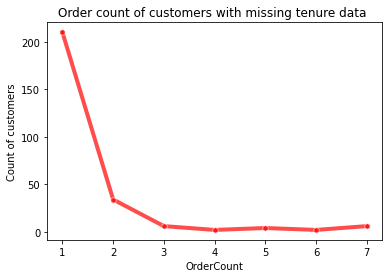

In [8]:
idx = df[df['Tenure']>31].index #Tenure of more than 31 months will be dropped
df.drop(index=idx, inplace=True)
MissingTenure=df[df['Tenure'].isnull()]
MisTen=MissingTenure['OrderCount'].value_counts()

sns.lineplot(x=MisTen.index, y=MisTen.values, linewidth=4,
         linestyle='-',
         color= 'r', 
         alpha=0.7,
         marker='h')
plt.title("Order count of customers with missing tenure data ")
plt.xlabel("OrderCount")
plt.ylabel("Count of customers")
plt.show()

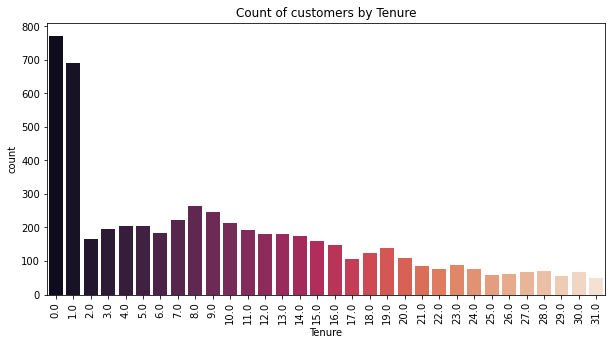

In [9]:
plt.figure(figsize=(10,5))
df['Tenure'] = df['Tenure'].replace(np.NaN, 0)
sns.countplot(x='Tenure', palette='rocket', data=df)
plt.xticks(rotation=90)
plt.title("Count of customers by Tenure")
plt.show()

Observations: The "Tenure" column has 264 records with NaN values and all other columns don't have any missing values in corresponding rows.

Reason: To find the reason for the missing values in the "Tenure" column, I analyzed the "OrderCount" column and found that the majority of customers with missing tenure data (80%) only purchased one product from the company. There's a possibility that these customers started using the company's services a few days prior to the data collection date or that they're in the middle of a free trial period, and thus can't be categorized as having a tenure of one full month. Therefore, we can assume that the duration of these customers using the services is less than one month and replace the NaN values with 0.

# 2.5. Correlation

In [10]:
df.corrwith(df['Churn']).sort_values(ascending=False)

Churn                          1.000000
Complain                       0.250488
NumberOfDeviceRegistered       0.107672
SatisfactionScore              0.105283
CityTier                       0.084870
WarehouseToHome                0.076732
NumberOfAddress                0.043857
HourSpendOnApp                 0.018946
CouponUsed                    -0.008321
OrderAmountHikeFromlastYear   -0.009723
OrderCount                    -0.028818
CashbackAmount                -0.153963
DaySinceLastOrder             -0.160847
Tenure                        -0.347238
dtype: float64

Based on ths correlation table we can say that Number of complains in the last month, Satisfaction Score have positive  correlation with Churn.Total number of orders last month, Average cashback in last month, Tenure have negative correlation. Tenure and Number of complains have relatively stronger correlation with Churn than other variables. In this case, it is interesting that Hours spent on the app is not an indicator(influencer) of customer churn.  

# Correlation Matrix

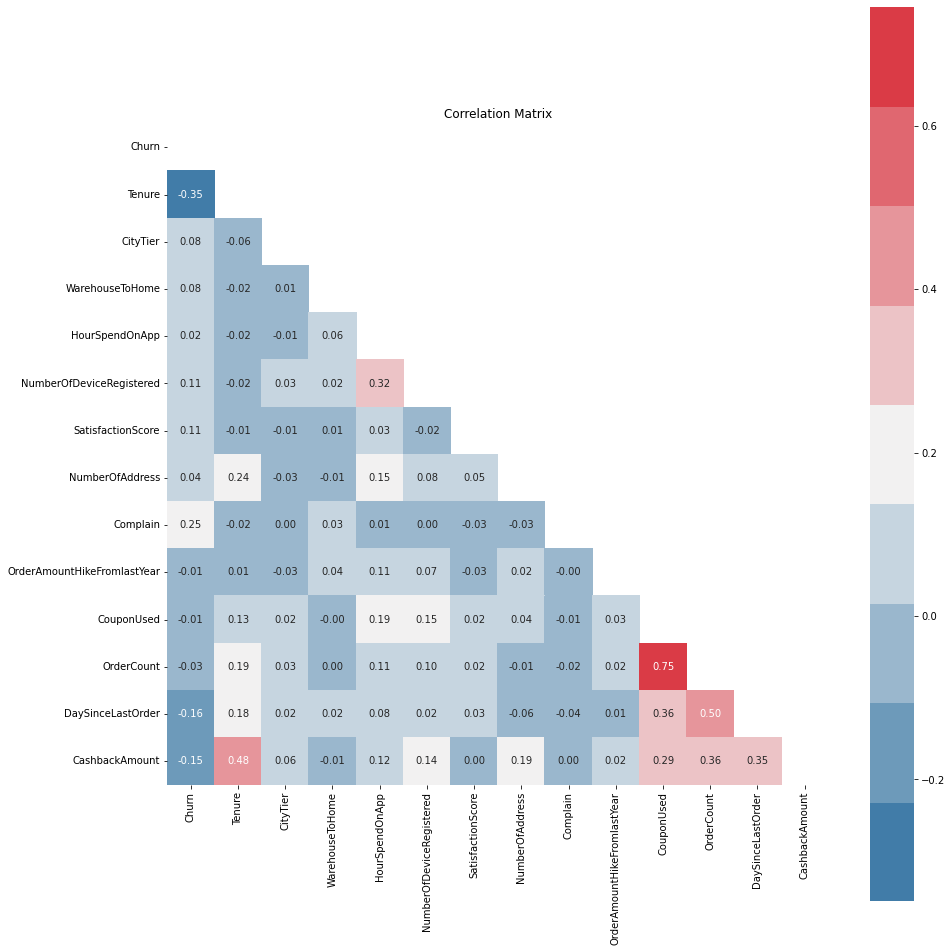

In [8]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(df.corr()))

# Custom color map
cmap = sns.diverging_palette(240, 10, n=9)

sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()


Correlation matrix helps us to obeserve relationship between pairs of variables. Here we can see that Cashback amount and Tenure, Hours spend on app and # of registered devices, Churn and Complains, Days since last order and Orders count, Order Count and Coupons Used all have positive correlation, which means that these pairs of variables move in the same direction and we need to pay attention to them in the part of building Machine learning model. 

# 2.6. Churn Visualizaion and Analysis

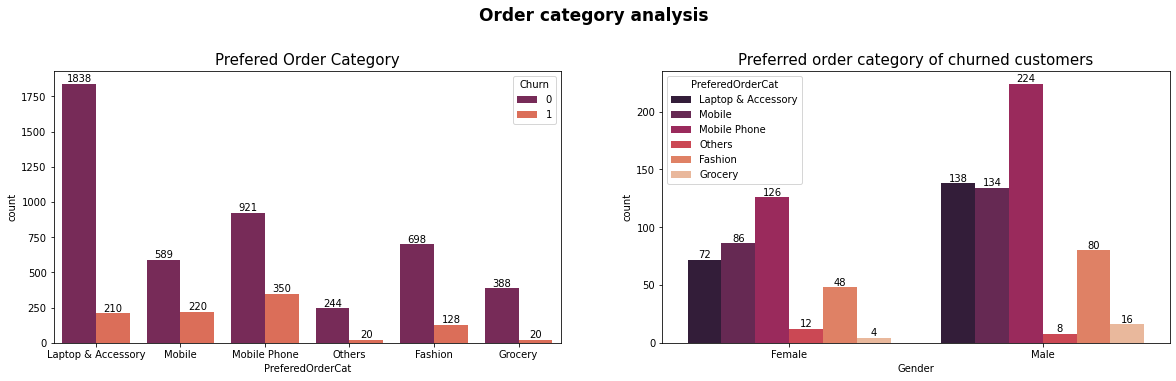

In [ ]:
#pay attention
def display_count(graph):
  graph.set_xticklabels(graph.get_xticklabels())
  for p in graph.patches:
      height = p.get_height()
      graph.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center",  va="bottom")

def make_space_above(axes, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = axes.flatten()[0].figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)

fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle("Order category analysis", fontsize = 17, weight = 'extra bold')

graph=sns.countplot(x='PreferedOrderCat', hue='Churn', palette='rocket', data=df, ax=axes[0])
display_count(graph)
axes[0].set_title("Prefered Order Category", fontsize = 15)

Churned=df[df['Churn']==1]
graph=sns.countplot(x='Gender', hue='PreferedOrderCat', palette='rocket', data= Churned, ax=axes[1])
display_count(graph)
axes[1].set_title("Preferred order category of churned customers", fontsize = 15)


make_space_above(axes, topmargin=1)   

plt.show()


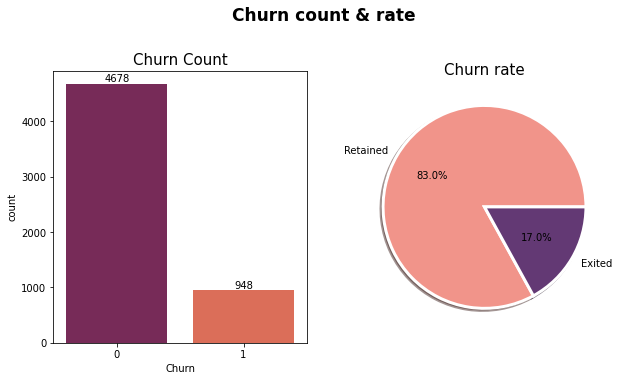

In [ ]:
#Building functions to use them with all graphs.
def display_count(graph):
    """ display count of each category"""
    graph.set_xticklabels(graph.get_xticklabels())
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center",  va="bottom")

def make_space_above(axes, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = axes.flatten()[0].figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)


fig, axes = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle("Churn count & rate", fontsize = 17, weight = 'extra bold')

graph=sns.countplot(x='Churn', palette='rocket', data=df, ax=axes[0])
display_count(graph)
axes[0].set_title("Churn Count", fontsize = 15)

churn_rate = np.round(df['Churn'].value_counts()/len(df)*100)
colors=['#F1948A', '#633974']
plt.pie(churn_rate, labels=['Retained','Exited'], autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, shadow = True, colors=colors)
axes[1].set_title("Churn rate", fontsize = 15)

make_space_above(axes, topmargin=1) 

plt.show()

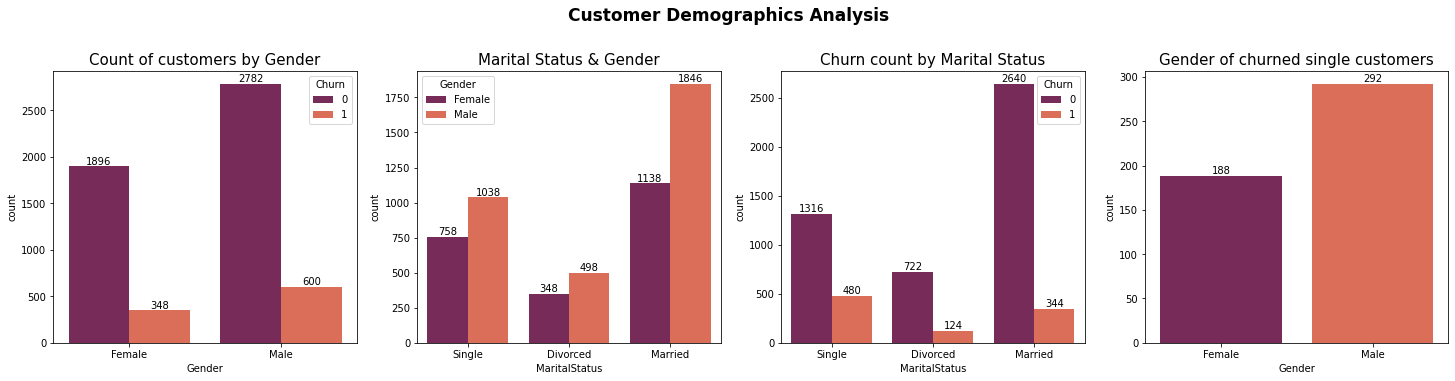

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(25, 5))

fig.suptitle("Customer Demographics Analysis", fontsize = 17, weight = 'extra bold')

# Gender
graph=sns.countplot(x='Gender', hue='Churn', palette='rocket', data=df, ax=axes[0])
display_count(graph)
axes[0].set_title("Count of customers by Gender", fontsize = 15)

# Marital Status & Gender
graph=sns.countplot(x='MaritalStatus', hue='Gender', palette='rocket', data=df, ax=axes[1])
display_count(graph)
axes[1].set_title("Marital Status & Gender", fontsize = 15)

# Marital Status
graph=sns.countplot(x='MaritalStatus', hue='Churn', palette='rocket', data=df, ax=axes[2])
graph.set_xticklabels(graph.get_xticklabels())
display_count(graph)
axes[2].set_title("Churn count by Marital Status", fontsize = 15)

# Gender of churned single customers
SingChurn = df[(df['Churn']==1) & (df['MaritalStatus']=='Single')]
graph=sns.countplot(x='Gender', palette='rocket', data=SingChurn, ax=axes[3])
display_count(graph)
axes[3].set_title("Gender of churned single customers", fontsize = 15)

make_space_above(axes, topmargin=1)   

plt.show()

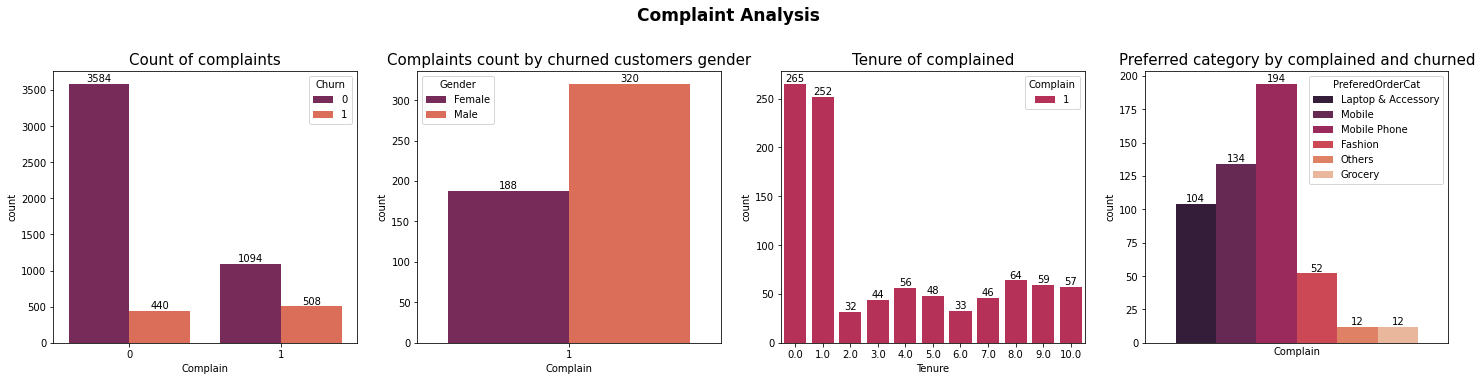

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(25, 5))

fig.suptitle("Complaint Analysis", fontsize = 17, weight = 'extra bold')

#Count of complaints
graph=sns.countplot(x= 'Complain', hue='Churn', palette='rocket', data=df, ax=axes[0])
display_count(graph)
plt.xticks([])
axes[0].set_title("Count of complaints", fontsize = 15)

# Complaint/gender
ComplainChurn=df[(df['Complain']==1) & (df['Churn']==1)]
graph=sns.countplot(x='Complain', hue='Gender', palette='rocket', data=ComplainChurn, ax=axes[1])
display_count(graph)
plt.xticks([])
axes[1].set_title("Complaints count by churned customers gender", fontsize = 15)

# Complaint/Tenure
ComplTenure=df[(df['Complain']==1)& (df['Tenure']<11)]
graph=sns.countplot(x='Tenure',hue='Complain', palette='rocket', data=ComplTenure, ax=axes[2])
display_count(graph)
plt.xticks(rotation=90)
axes[2].set_title("Tenure of complained", fontsize = 15)

# Complaint/Preferred Order Category
ComplainChurn=df[(df['Complain']==1) & (df['Churn']==1)]
graph=sns.countplot(x='Complain', hue='PreferedOrderCat', palette='rocket', data=ComplainChurn, ax=axes[3])
display_count(graph)
plt.xticks([])
axes[3].set_title("Preferred category by complained and churned", fontsize = 15)

make_space_above(axes, topmargin=1)   

plt.show()



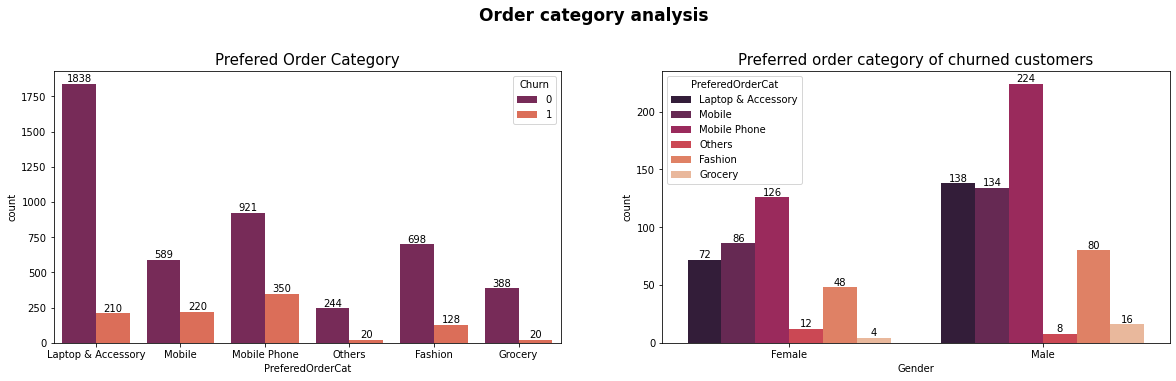

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

fig.suptitle("Order category analysis", fontsize = 17, weight = 'extra bold')

# Prefered Order Category
graph=sns.countplot(x='PreferedOrderCat', hue='Churn', palette='rocket', data=df, ax=axes[0])
display_count(graph)
axes[0].set_title("Prefered Order Category", fontsize = 15)

# Preferred order category of churned customers
Churned=df[df['Churn']==1]
graph=sns.countplot(x='Gender', hue='PreferedOrderCat', palette='rocket', data= Churned, ax=axes[1])
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center",  va="bottom")
axes[1].set_title("Preferred order category of churned customers", fontsize = 15)

make_space_above(axes, topmargin=1)   

plt.show()


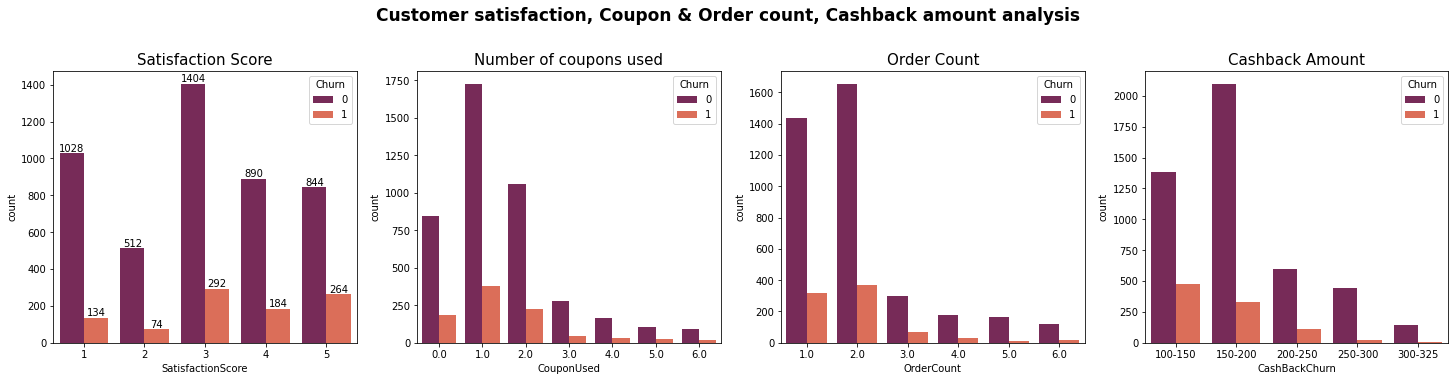

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(25, 5))

fig.suptitle("Customer satisfaction, Coupon & Order count, Cashback amount analysis", fontsize = 17, weight = 'extra bold')

# Satisfaction score
graph=sns.countplot(x='SatisfactionScore',hue='Churn', palette='rocket', data=df, ax=axes[0])
display_count(graph)
axes[0].set_title("Satisfaction Score", fontsize = 15)

# Number of coupons used
CouponChurn = df[df['CouponUsed']<7]
sns.countplot(x='CouponUsed', hue='Churn', palette='rocket', data=CouponChurn, ax=axes[1])
axes[1].set_title("Number of coupons used", fontsize = 15)

# Order Count
OrderChurn = df[df['OrderCount']<7]
sns.countplot(x='OrderCount', hue='Churn', palette='rocket', data=OrderChurn, ax=axes[2])
axes[2].set_title("Order Count", fontsize = 15)

# Cashback amount
df1=df[df['CashbackAmount']>99].copy()
df1['CashBackChurn']=pd.cut(df['CashbackAmount'], bins=[100, 150, 200, 250, 300, 325], labels=['100-150', '150-200', '200-250', '250-300', '300-325'])
sns.countplot(x='CashBackChurn', hue='Churn', palette='rocket', data=df1, ax=axes[3])
axes[3].set_title("Cashback Amount", fontsize = 15)

make_space_above(axes, topmargin=1)   

plt.show()

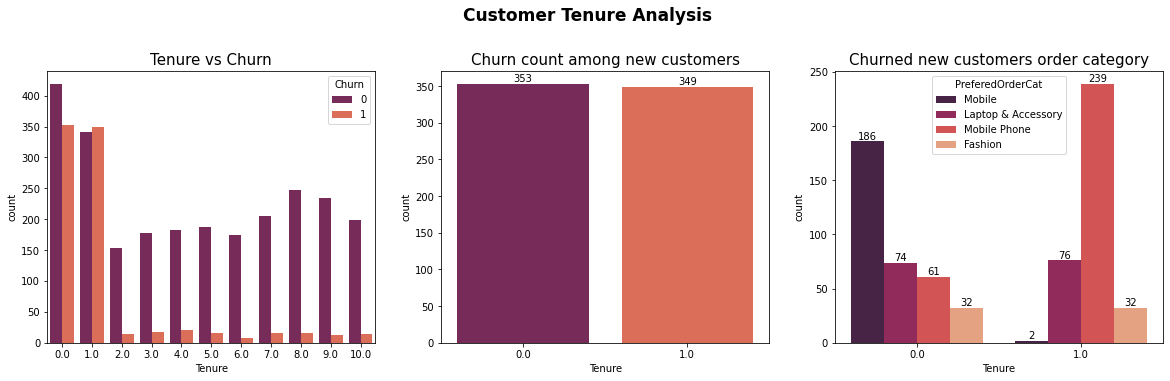

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))
fig.suptitle("Customer Tenure Analysis", fontsize = 17, weight = 'extra bold')

# Tenure/Churn
TenChurn = df[df['Tenure']<11]
sns.countplot(x='Tenure', hue='Churn', palette='rocket', data=TenChurn, ax=axes[0])
axes[0].set_title("Tenure vs Churn", fontsize = 15)

# Tenure/Churn
NewCustTen=df[(df['Tenure']<2) & (df['Churn']==1)]
graph=sns.countplot(x='Tenure', palette='rocket', data=NewCustTen, ax=axes[1])
display_count(graph)
axes[1].set_title("Churn count among new customers", fontsize = 15)

# Churned new customers order category
graph=sns.countplot(x='Tenure', hue='PreferedOrderCat', palette='rocket', data=NewCustTen, ax=axes[2])
display_count(graph)
axes[2].set_title("Churned new customers order category", fontsize = 15)

make_space_above(axes, topmargin=1)   

plt.show()

# **2.7. Major inferences we can make based on EDA**
The customer churn rate of the e-commerce company in the given period was 17%, which means that 948 customers out of 5630 left the company. 

The factors that were found to be correlated with higher churn rates are the number of customer complaints raised in the given month, the tenure of the customers, and the cashback amount received by the customers. However, it is not possible to compare the churn rate to previous periods as no data from previous periods is available. 

**Consumer Demographics** 

The company's users are predominantly males, accounting for 60% of the user base. Similarly, 63% of customers who left the company are also males. 53% of all users are married, however, the churn rate is higher among single users, with 61% of single customers who left being males.

**Complaint Analysis**

The company received 1,602 complaints over the given period and 48% of those who complained (508 customers) stopped using the company's services. This suggests that the Customer service department was not effectively resolving customer complaints. The majority of the complaints, 517, came from new customers who subscribed in the last month. Therefore, special attention should be given to complaints from new customers as their churn rate is the highest. Male customers who left the company had 70% more complaints compared to female customers. The mobile phone and mobile device categories, followed by laptops, were the most common sources of complaints and customer churn. As a result, special attention should be given to new customers, particularly those with a preference for mobile phones and mobile devices, to retain them. To keep these customers engaged and satisfied, the company may need to implement special marketing tactics, such as promotions and additional cashback offers.

**Consumer Satisfaction Analysis**

The Customer Satisfaction Score (CSAT) measures the level of customer happiness with the company and can help to identify areas for improvement to increase retention rates and improve the company's reputation. In this case, the average satisfaction score was 3.06, which corresponds to a CSAT score of 61%, lower than the eCommerce industry average CSAT of 77% in 2021. The company needs to analyze the root causes of customer dissatisfaction, whether it's due to slow responses, low-quality responses, or other factors affecting the customer experience.

The correlation between churn rate and customer satisfaction score (CSAT) is usually expected to be negative, meaning that customers with higher satisfaction scores are less likely to leave the company. However, in this case, the correlation is positive, with a coefficient of 0.11, indicating that customers who gave higher satisfaction scores were more likely to churn. Even customers who gave the highest satisfaction scores of 4 and 5 churned at higher rates (17.1% and 23%), suggesting that even customers with good experiences may still switch to competitors. This highlights the importance for the company to not only maintain high levels of customer satisfaction, but also to regularly analyze the competition and continuously evaluate and improve the customer experience to prevent churn. This can be achieved through regular customer feedback, surveys, and analysis of customer behaviors and preferences. By staying ahead of competitors and delivering an exceptional customer experience, the company can increase customer loyalty, reduce churn, and improve overall business success.


**Preferred Order Category Analysis**

Laptops and accessories were the most preferred product categories among all users, followed by mobile phones. The preferred order category of churned customers was mobile phones, with the most number of customers leaving (350), followed by mobile devices (220) and laptops (210). This high churn rate among customers who prefer these product categories could be due to inadequate customer service provided by the company for these product categories, as well as more favorable deals, promotions, and customer experiences offered by competing e-commerce platforms. The company should perform a thorough analysis of their customer service and the offerings of competing e-commerce platforms to understand the reasons for the high churn rate among these customers and take steps to improve customer retention.

**Coupons, Order Amount & Cashback Amount Analysis**

37% of customers used at least 1 coupon. Here coupon usage does not impact on customer retention, as there is negative very low correlation equal to -0.008321 between churn and coupon usage. 67% of customers made 1 or 2 orders in the given month. Churn rate is also high among the customers with less than 3 orders in the given month. Cashback amount has an impact on churn, e.g. customers tend to continue using the services if they get more cashback. There is negative correlation equal to -0.15 between Churn and Cashback amount. This means the more cashback amount the customers gets, the lower the churn rate. 
Overall, the company should focus on providing attractive cashback incentives to its customers to retain them, and implement effective coupon usage strategies. The company should also focus on improving customer experience, especially for customers with less than 3 orders, as the churn rate is higher for these customers. An analysis of customer behavior and offering personalized incentives for these customers may help to reduce churn.

**Tenure Analysis**

For the last 2 months the company acquired 1,462 new customers. Among these new customers 702(48%) churned. To be more specific, the company is losing 48% of its new customers. According to Harvard Business Review, it’s five to 25 times more expensive to attract new customers than hold onto existing ones. In terms of preferred order category of new and exited customers: last month's  customers' preferred order category was mobile. On the other hand, the previous month's new customers' preferred order category was Mobile phone, Mobile category was the least popular. There is a need to revise customer policy of newly acquared customers, especially Mobile and Mobile Phone order categories. 


# **2.8. Based on EDA, the following recommendations can be made to the business**

1. **Improve customer service** - A high number of complaints were received for Mobile Phones and Mobile devices. To retain customers in these categories, the company should focus on improving customer service and provide prompt and effective solutions to customer issues.

2. **Analyze competitors** - The high churn rate among customers who rated high satisfaction score can be due to better deals, promotions, and customer experience offered by competitors. The company should analyze competitor activities and continuously evaluate and improve its own customer experience.

3. **Evaluate cashback policy** - The data shows that cashback amount has a significant impact on customer churn. The company should revise its cashback policy to ensure customers receive more benefits, which will lead to a lower churn rate.

4. **Revise customer policy for new customers** - The high churn rate among new customers highlights the need for the company to revise its customer policy for newly acquired customers. In particular, the company should focus on retaining customers in the Mobile and Mobile phone categories.

5. **Offer more value to customers** - The data suggests that coupon usage does not significantly impact customer retention. To retain customers, the company should focus on offering more value to customers by providing them with more cashback, better deals, and promotions.

6. **Focus on retaining customers with low order frequency** - The high churn rate among customers who made less than 3 orders in a given month shows the need for the company to focus on retaining these customers. By providing them with more personalized offers and promotions, the company can reduce their churn rate.

7. **Personalize incentives for customers** - The company can analyze customer behavior and offer personalized incentives based on their preferences and order history to increase customer loyalty and reduce churn.



